In [1]:
!pip install retina-face
!pip install deepface
pass

In [2]:
import cv2
from retinaface import RetinaFace
img_path = "./datasets/Wonyoung/1.jpg"
resp = RetinaFace.detect_faces(img_path)
print(resp)


{'face_1': {'score': 0.999681830406189, 'facial_area': [173, 117, 290, 277], 'landmarks': {'right_eye': [215.545, 181.54971], 'left_eye': [264.93472, 195.86566], 'nose': [235.80077, 221.29085], 'mouth_right': [201.15369, 231.16246], 'mouth_left': [246.16557, 243.20117]}}}


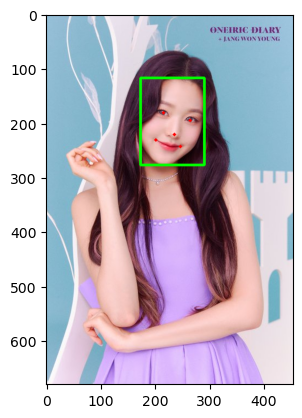

In [3]:
# from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

for people in resp:
  cv2.rectangle(img_rgb, (resp[people]['facial_area'][0],resp[people]['facial_area'][1]), (resp[people]['facial_area'][2], resp[people]['facial_area'][3]), (0,255,0), 3)
  for feature, mark in resp[people]['landmarks'].items():
    # print(f"{feature} {mark}")
    cv2.circle(img_rgb, (int(mark[0]), int(mark[1])), 1, (255,0,0), 4)

# img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# show using cv2
# cv2_imshow(img)
plt.imshow(img_rgb)
plt.show()

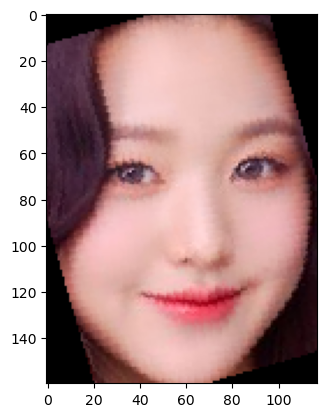

In [4]:
import matplotlib.pyplot as plt
faces = RetinaFace.extract_faces(img_path = img_path, align = True)
for face in faces:
  plt.imshow(face)
  plt.show()

In [6]:
from deepface import DeepFace
obj = DeepFace.verify("./datasets/Wonyoung/0.jpg", "./datasets/Wonyoung/4.jpg"
          , model_name = 'ArcFace', detector_backend = 'retinaface')
print(obj["verified"])

23-12-19 19:51:10 - arcface_weights.h5 will be downloaded to C:\Users\pe256/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: C:\Users\pe256\.deepface\weights\arcface_weights.h5
100%|██████████| 137M/137M [01:04<00:00, 2.11MB/s] 


True
